### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 3

원저자:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

2차저자:
- 문현지, 민태규

전치태반 여아 출생 가능성(BDA3 p. 37)

conjugate가 아닌 경우에도 다음과 같이 사후분포를 구할 수 있습니다.

> grid설정 후 각 prior에 likelihood곱한 값을 grid 상 각 point에서 정규화

> discrete-grid, Invese-cdf를 이용해 정규화되지 않은 사후분포에서 샘플링

In [3]:
util_path
import plot_tools

ModuleNotFoundError: No module named 'plot_tools'

In [1]:
# plot, import관련 초기 설정
import numpy as np
from scipy.stats import beta
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)
import plot_tools
plt.rc('font', size=12)

ModuleNotFoundError: No module named 'plot_tools'

#### Calculate results

In [47]:
# 데이터 (437,543)
a = 437
b = 543

# 0,1 사이 1000개 point로 그리드 설정
nx = 1000
x = np.linspace(0, 1, nx)

# 켤레형 사전분포가 아닌 경우 밀도를 grid방식으로 계산
# 이는 BDA Figure2.4 과 동일한 사전분포 (삼각분포)
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, np.count_nonzero(ascent))
pp[descent] = np.linspace(pm, 1, np.count_nonzero(descent))

# 사전분포 정규화
pp /= np.sum(pp)

# 정규화되지 않은 non-conjugate 사후분포를 그리드 상에 표시
po = beta.pdf(x, a, b)*pp
po /= np.sum(po)

# 누적분포
pc = np.cumsum(po)

# 역누적분포에서의 샘플링
# 균일분포 [0,1]에서 n개 점 샘플링
n = 10000
r = np.random.rand(n)
# n개의 점(r)을 해당 grid point x(영역)에 mapping
# [0, pc[0]) -> x[0], [pc[i-1], pc[i]] -> x[i]
rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]

#### Plot results

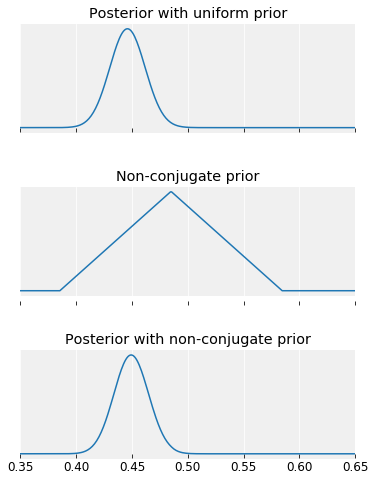

In [48]:
# 3개의 subplot
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 8))
# x축만 보이게 설정
plot_tools.modify_axes.only_x(axes)
# spacing 조정
fig.subplots_adjust(hspace=0.5)

# 사전분포가 Beta(1,1) (=uniform) 일때의 사후분포
axes[0].plot(x, beta.pdf(x, a+1, b+1))
axes[0].set_title('Posterior with uniform prior')

# 켤레형 사전분포가 아닌 경우: 앞서 생성한 pp이용
axes[1].plot(x, pp)
axes[1].set_title('Non-conjugate prior')

# pp의 사후분포
axes[2].plot(x, po)
axes[2].set_title('Posterior with non-conjugate prior')


# x범위 설정
axes[0].set_xlim((0.35, 0.65));

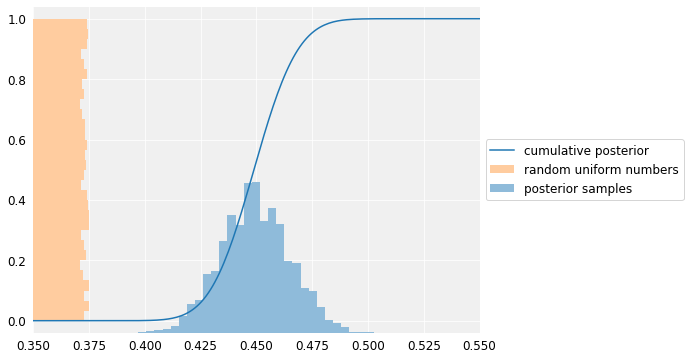

In [49]:
# 샘플 plot

# 배경 설정
plt.style.use(plot_tools.custom_styles['gray_background'])
plt.figure(figsize=(8, 6))

# calculate histograms and scale them into the same figure
# 히스토그램 계산 후 동일 figure에 그리기 위해 scale조정
hist_r = np.histogram(r, bins=30)
hist_rr = np.histogram(rr, bins=30)

# uniform(0,1)의 샘플 (아래 그림에서 주황 부분)
plt.barh(
    hist_r[1][:-1],
    hist_r[0]*0.025/hist_r[0].max(),
    height=hist_r[1][1]-hist_r[1][0],
    left=0.35,
    align='edge',
    color=plot_tools.lighten('C1', 0.6),
    label='random uniform numbers'
)
# 사후 샘플 (아래 그림에서 파란 부분)
plt.bar(
    hist_rr[1][:-1],
    hist_rr[0]*0.5/hist_rr[0].max(),
    width=hist_rr[1][1]-hist_rr[1][0],
    bottom=-0.04,
    align='edge',
    color=plot_tools.lighten('C0'),
    label='posterior samples'
)
# 누적 사후분포 plot
plt.plot(
    x,
    pc,
    color='C0',
    label='cumulative posterior'
)

# legend
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    fontsize=12
)
# 범위 설정
plt.xlim((0.35, 0.55))
plt.ylim((-0.04, 1.04));